In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle
from joblib import dump, load
import joblib

%matplotlib inline

Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

Data: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [ ]:
data = pd.read_csv('/content/sample_data/Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(150, 6)

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Уникальные значения
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

## Графики

<ipython-input-11-8b3458e4134c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='PetalWidthCm', y='Species', inner='stick', palette='Dark2')


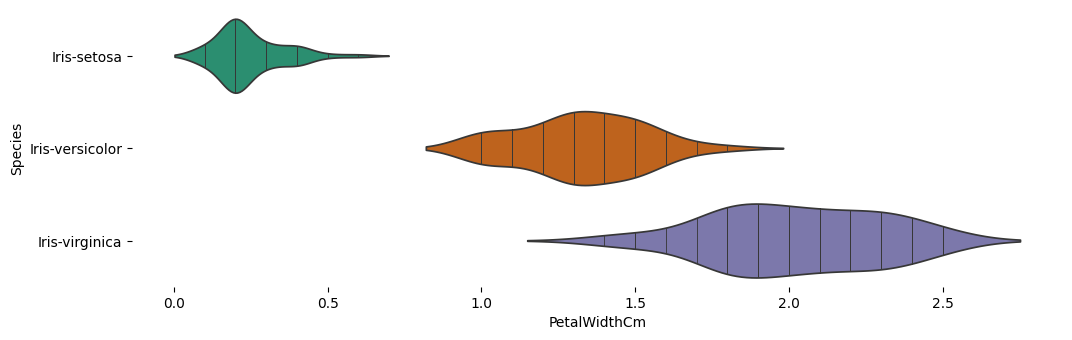

In [ ]:
# @title Species vs PetalWidthCm

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='PetalWidthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-10-8981a7c7942e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='PetalLengthCm', y='Species', inner='stick', palette='Dark2')


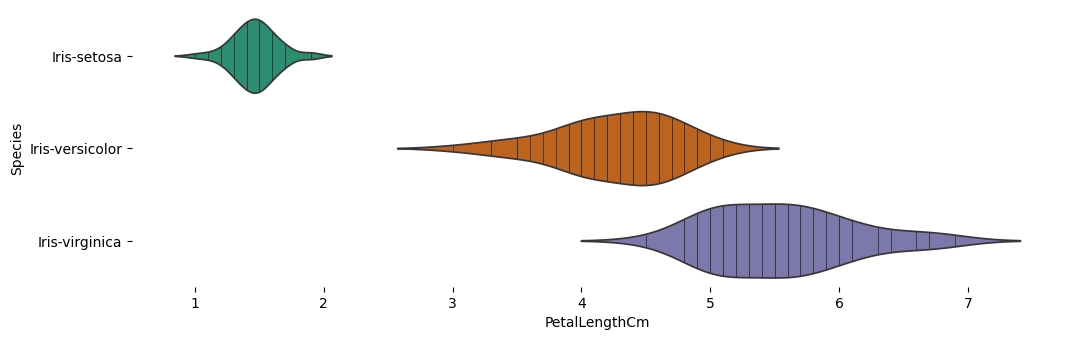

In [ ]:
# @title Species vs PetalLengthCm

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='PetalLengthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-9-251ea1c8ad13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='SepalWidthCm', y='Species', inner='stick', palette='Dark2')


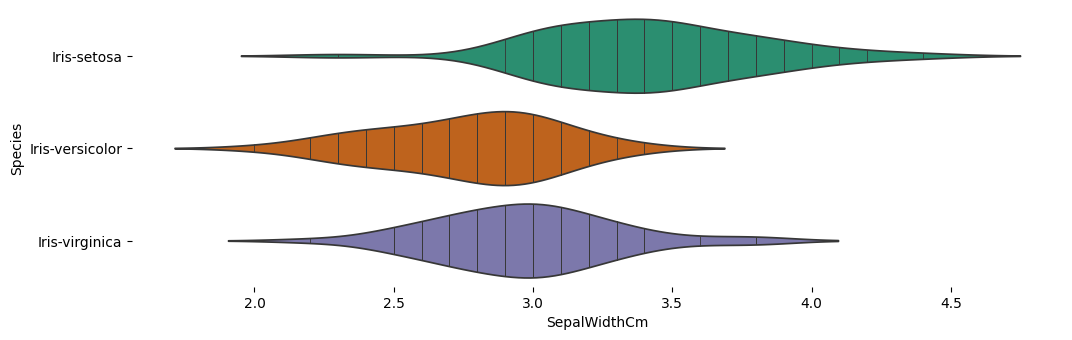

In [ ]:
# @title Species vs SepalWidthCm

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='SepalWidthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-8-34eda21fbfaf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='SepalLengthCm', y='Species', inner='stick', palette='Dark2')


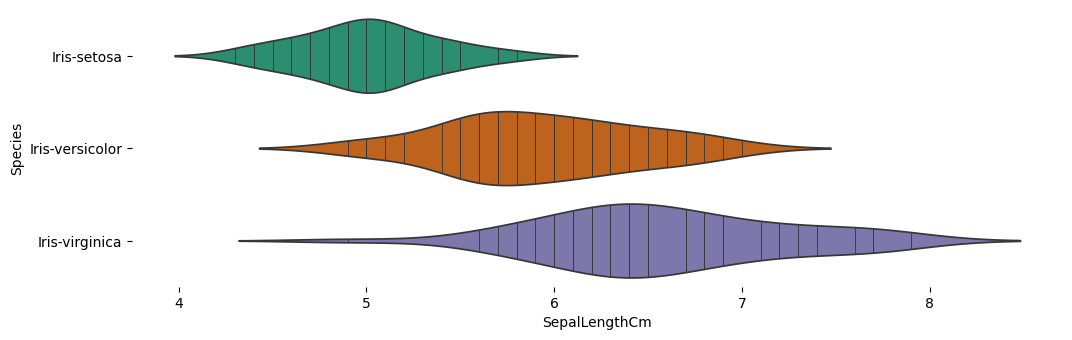

In [ ]:
# @title Species vs SepalLengthCm

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='SepalLengthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

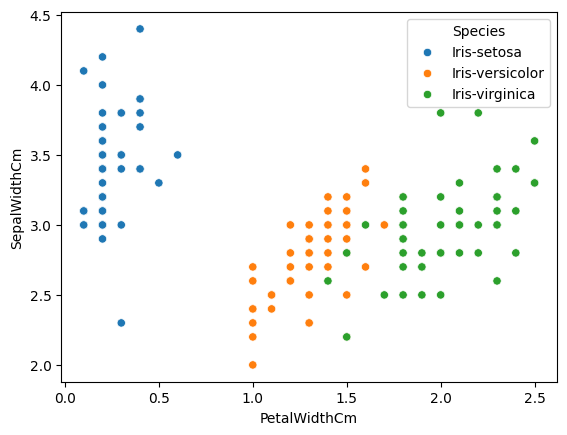

In [ ]:
# @title Petal Width vs Sepal Width by Species

sns.scatterplot(data=data, x="PetalWidthCm", y="SepalWidthCm", hue="Species")

<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

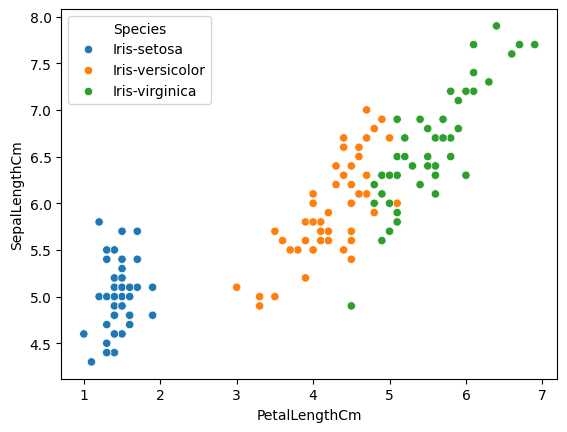

In [ ]:
# @title Sepal Length vs Petal Length by Species

sns.scatterplot(data=data, x="PetalLengthCm", y="SepalLengthCm", hue="Species")

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

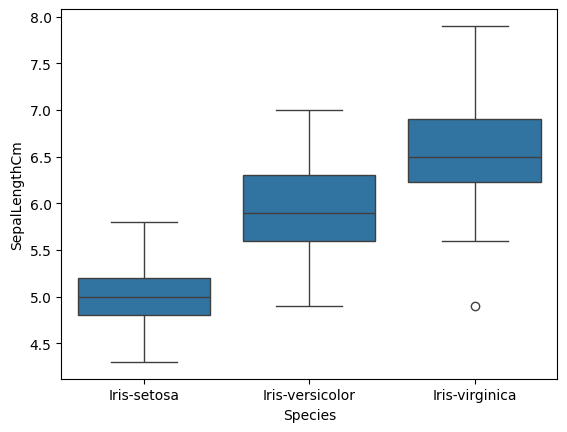

In [ ]:
# @title SepalLengthCm Distribution by Species

sns.boxplot(x='Species', y='SepalLengthCm', data=data)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

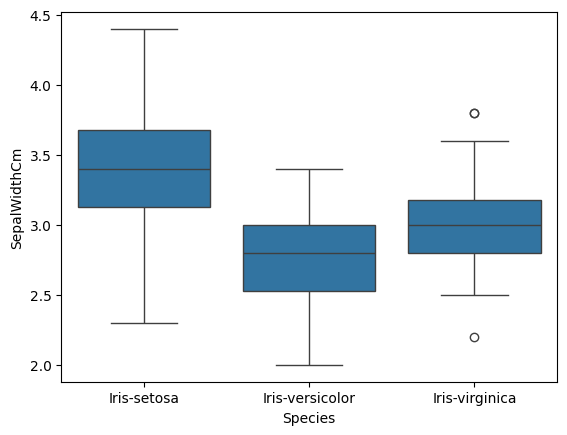

In [ ]:
# @title SepalWidthCm Distribution by Species

sns.boxplot(x='Species', y='SepalWidthCm', data=data)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

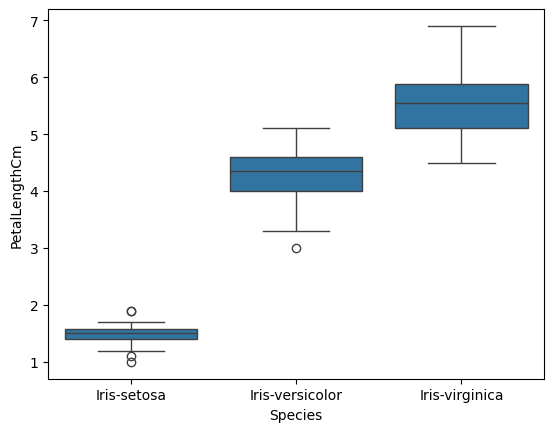

In [ ]:
# @title PetalLengthCm Distribution by Species

sns.boxplot(x='Species', y='PetalLengthCm', data=data)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

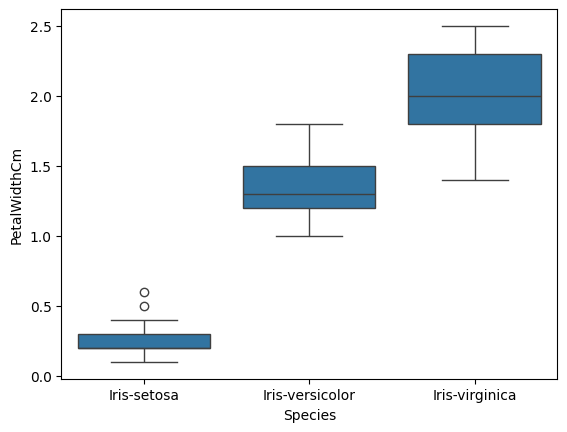

In [ ]:
# @title PetalWidthCm Distribution by Species

sns.boxplot(x='Species', y='PetalWidthCm', data=data)

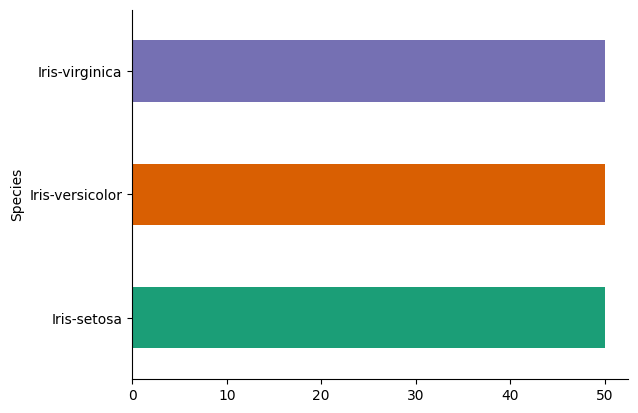

In [ ]:
# @title Species

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

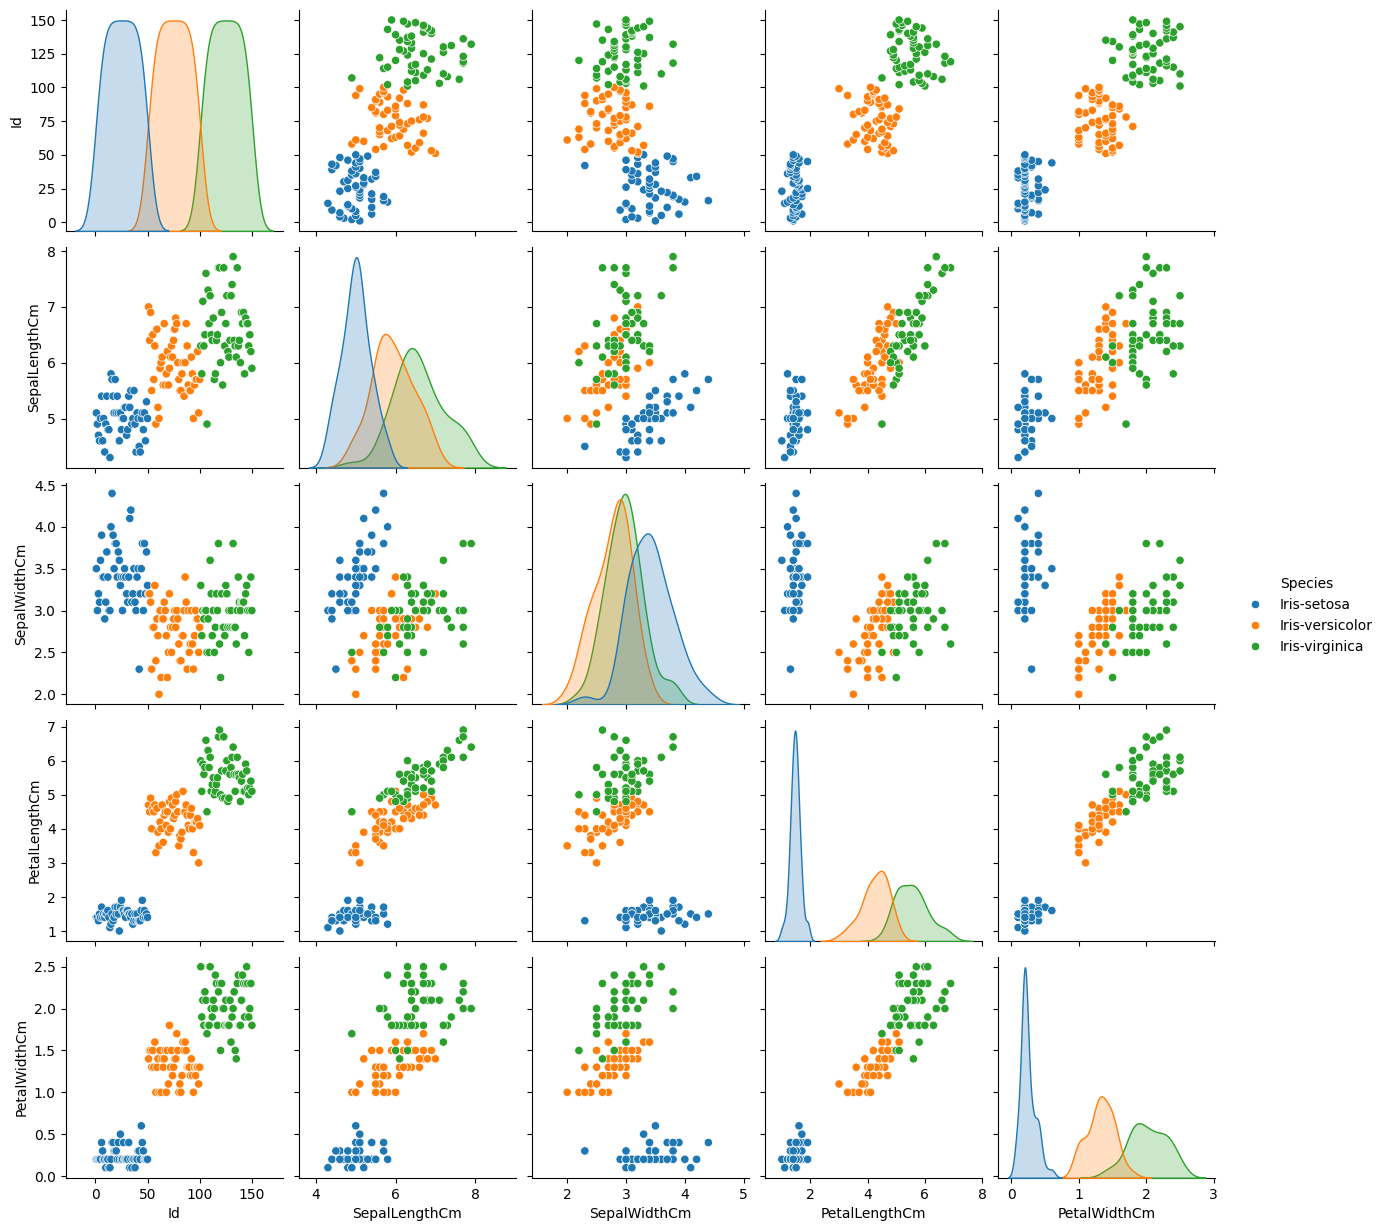

In [ ]:
sns.pairplot(data, hue='Species')

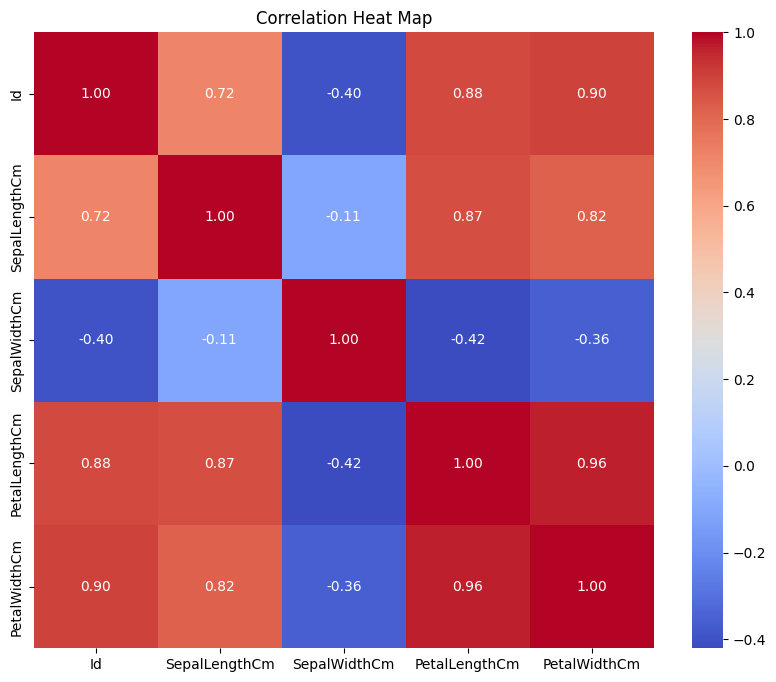

In [ ]:
#Creating a Correlation Matrix
df_numeric = data.drop(columns=['Species'])
correlation_matrix = df_numeric.corr()

#Building a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map')
plt.show()

## EDA

In [ ]:
#Interquartile range calculation
Q1 = data['SepalLengthCm'].quantile(0.25)
Q3 = data['SepalLengthCm'].quantile(0.75)
IQR = Q3 - Q1

#Setting limits for emissions
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Print emissions
outliers = data[(data['SepalLengthCm'] < lower_bound) | (data['SepalLengthCm'] > upper_bound)]
print("Emissions:")
print(outliers)

Выбросы:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [ ]:
#Interquartile range calculation
Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

#Setting limits for emissions
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Print emissions
outliers = data[(data['SepalWidthCm'] < lower_bound) | (data['SepalWidthCm'] > upper_bound)]
print("Emissions:")
print(outliers)

Выбросы:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  


In [ ]:
#Interquartile range calculation
Q1 = data['PetalLengthCm'].quantile(0.25)
Q3 = data['PetalLengthCm'].quantile(0.75)
IQR = Q3 - Q1

#Setting limits for emissions
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Print emissions
outliers = data[(data['PetalLengthCm'] < lower_bound) | (data['PetalLengthCm'] > upper_bound)]
print("Emissions:")
print(outliers)

Выбросы:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [ ]:
#Interquartile range calculation
Q1 = data['PetalWidthCm'].quantile(0.25)
Q3 = data['PetalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

#Setting limits for emissions
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print emissions
outliers = data[(data['PetalWidthCm'] < lower_bound) | (data['PetalWidthCm'] > upper_bound)]
print("Emissions:")
print(outliers)

Выбросы:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


We have emissions

In [ ]:
#X, y
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [ ]:
#Dividing data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialization and training of a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

class_name = data.Species.unique()

In [ ]:
columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:
class_name

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

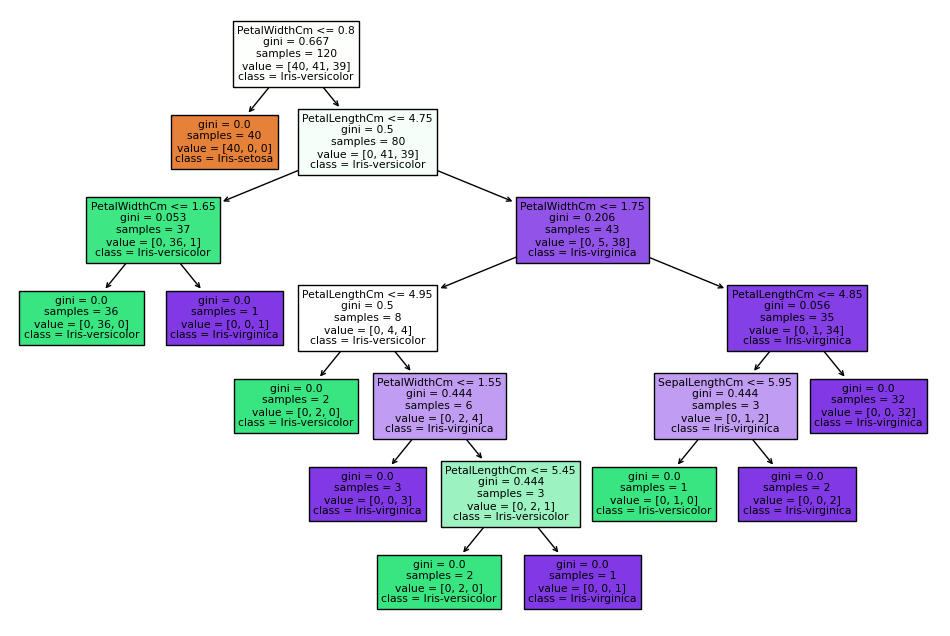

In [ ]:
#Visualization of a decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=columns, class_names=class_name, filled=True)
plt.show()

In [ ]:
#Model Prediction
y_pred = clf.predict(X_test)

In [ ]:
#Checking the accuracy of the model
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#Classification report
classification_report(y_test, y_pred, target_names=class_name)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

In [ ]:
#Error Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

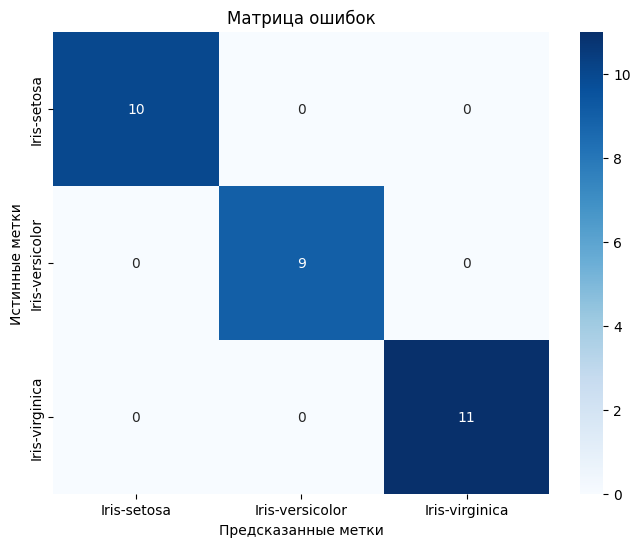

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted Labels')
plt.ylabel('True marks')
plt.title('Error matrix')
plt.show()

In [ ]:
#Saving a model to a file
joblib_file = "decision_tree_model.joblib"
joblib.dump(clf, joblib_file)

['decision_tree_model.joblib']

In [ ]:
#Loading a model from a file
loaded_model = joblib.load("decision_tree_model.joblib")

In [ ]:
#Using a loaded model to make predictions
y_pred = loaded_model.predict([[5.6, 2.5, 3.9 , 1.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred

array(['Iris-versicolor'], dtype=object)